In [23]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [5]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 2.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 3.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 4.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00


In [6]:
df=pd.DataFrame()

In [9]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [10]:
df

X1  X2  label
0   1   5      1
1   2   3      1
2   3   6      0
3   4   8      1
4   5   1      0
5   6   9      1
6   6   5      0
7   7   8      1
8   9   9      0
9   9   2      0

In [12]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

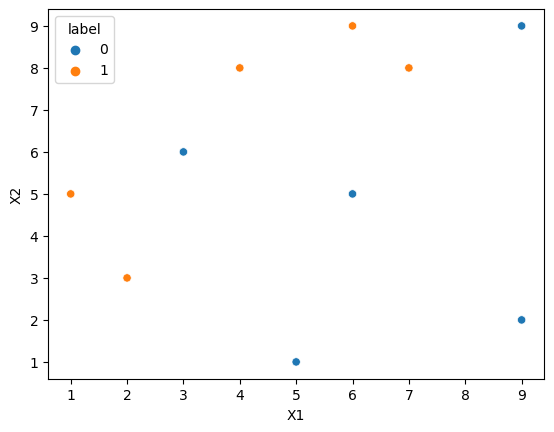

In [14]:
sns.scatterplot(x=df["X1"],y=df["X2"],hue=df["label"])

In [18]:
df.shape

(10, 4)

In [19]:
#1/no. of rows
df.shape[0]

10

In [20]:
df["sample_weights"]=1/df.shape[0]

In [21]:
df

X1  X2  label  sample_weights
0   1   5      1             0.1
1   2   3      1             0.1
2   3   6      0             0.1
3   4   8      1             0.1
4   5   1      0             0.1
5   6   9      1             0.1
6   6   5      0             0.1
7   7   8      1             0.1
8   9   9      0             0.1
9   9   2      0             0.1

In [25]:
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier(max_depth=1)   #stump

In [26]:
X=df.iloc[:,0:2]

In [27]:
y=df.iloc[:,2]

In [28]:
X

X1  X2
0   1   5
1   2   3
2   3   6
3   4   8
4   5   1
5   6   9
6   6   5
7   7   8
8   9   9
9   9   2

In [29]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [30]:
DT1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [31]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

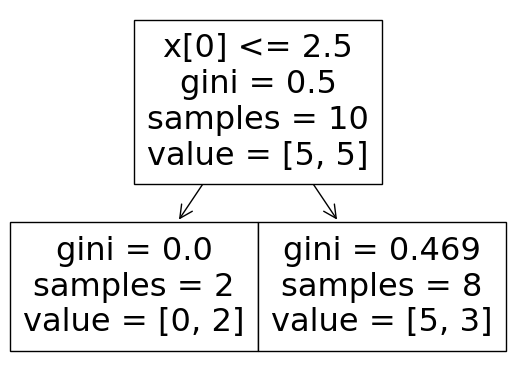

In [32]:
plot_tree(DT1)

In [38]:
np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

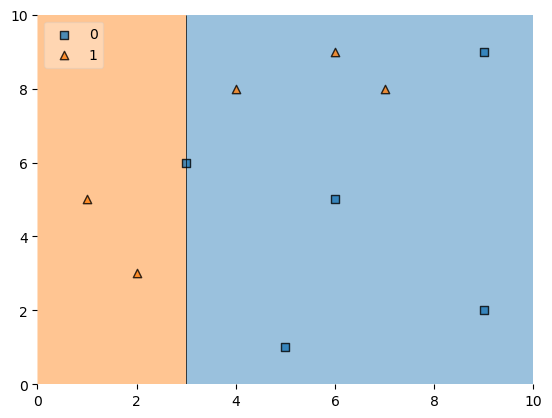

In [41]:
plot_decision_regions(np.array(X),np.array(y),clf=DT1,legend=2)

In [43]:
df['y_pred']=DT1.predict(X)

In [46]:
df #we re getting three misclassified points(see the differences between the column label and y_pred)

X1  X2  label  sample_weights  y_pred
0   1   5      1             0.1       1
1   2   3      1             0.1       1
2   3   6      0             0.1       0
3   4   8      1             0.1       0
4   5   1      0             0.1       0
5   6   9      1             0.1       0
6   6   5      0             0.1       0
7   7   8      1             0.1       0
8   9   9      0             0.1       0
9   9   2      0             0.1       0

In [47]:
#calculating the performance of the stump
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [50]:
alpha1 = calculate_model_weight(0.3) #error will be 0.3 because three misclassified points hence, 0.1+0.1+0.1=0.3
alpha1
#suppose we get the error zero then, we have to add very very small value like 0.00001

0.42364893019360184

In [55]:
#calculate the updated weight
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['sample_weights']*np.exp(-alpha)
    else:
        return row['sample_weights']*np.exp(alpha)

In [56]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [59]:
df   #wherever mis classified points, we are getting 0.15

X1  X2  label  sample_weights  y_pred  updated_weights
0   1   5      1             0.1       1         0.065508
1   2   3      1             0.1       1         0.065508
2   3   6      0             0.1       0         0.065508
3   4   8      1             0.1       0         0.152653
4   5   1      0             0.1       0         0.065508
5   6   9      1             0.1       0         0.152653
6   6   5      0             0.1       0         0.065508
7   7   8      1             0.1       0         0.152653
8   9   9      0             0.1       0         0.065508
9   9   2      0             0.1       0         0.065508

In [60]:
df['sample_weights'].sum()

1.0

In [61]:
df['updated_weights'].sum()

0.9165153319682015

In [62]:
#now we would create the normalized weights
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [63]:
df

X1  X2  label  sample_weights  y_pred  updated_weights  normalized_weights
0   1   5      1             0.1       1         0.065508            0.071475
1   2   3      1             0.1       1         0.065508            0.071475
2   3   6      0             0.1       0         0.065508            0.071475
3   4   8      1             0.1       0         0.152653            0.166559
4   5   1      0             0.1       0         0.065508            0.071475
5   6   9      1             0.1       0         0.152653            0.166559
6   6   5      0             0.1       0         0.065508            0.071475
7   7   8      1             0.1       0         0.152653            0.166559
8   9   9      0             0.1       0         0.065508            0.071475
9   9   2      0             0.1       0         0.065508            0.071475

In [64]:
df['normalized_weights'].sum()

1.0

In [66]:
np.cumsum(df['normalized_weights'])

0    0.071475
1    0.142950
2    0.214425
3    0.380983
4    0.452458
5    0.619017
6    0.690492
7    0.857050
8    0.928525
9    1.000000
Name: normalized_weights, dtype: float64

In [69]:
#now we would create the buckets or bins
df['cumsum_upper']=np.cumsum(df['normalized_weights'])
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']
df[['X1','X2','label','sample_weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]
#wherever we have the misclassified pint, th bin or the bucket size of that point is bigger

X1  X2  label  sample_weights  y_pred  updated_weights  cumsum_lower  \
0   1   5      1             0.1       1         0.065508      0.000000   
1   2   3      1             0.1       1         0.065508      0.071475   
2   3   6      0             0.1       0         0.065508      0.142950   
3   4   8      1             0.1       0         0.152653      0.214425   
4   5   1      0             0.1       0         0.065508      0.380983   
5   6   9      1             0.1       0         0.152653      0.452458   
6   6   5      0             0.1       0         0.065508      0.619017   
7   7   8      1             0.1       0         0.152653      0.690492   
8   9   9      0             0.1       0         0.065508      0.857050   
9   9   2      0             0.1       0         0.065508      0.928525   

   cumsum_upper  
0      0.071475  
1      0.142950  
2      0.214425  
3      0.380983  
4      0.452458  
5      0.619017  
6      0.690492  
7      0.857050  
8      0.928525  
9      1.000000

In [87]:
#doing random sampling for the next DT
#generating 10 random weights
indexes=[]
for i in range(df.shape[0]):
    #print(i)
    a=np.random.random()
    #print(a)
    for index,row in df.iterrows():
        #print(index)
        #print(row)
        if row['cumsum_upper']>a and a>row['cumsum_lower']:
            indexes.append(index)

In [88]:
indexes   #we are getting these after that which we would pass to our next data

[7, 1, 3, 5, 5, 3, 8, 5, 0, 3]

In [92]:
second_df=df.iloc[indexes][["X1","X2","label","sample_weights"]]

In [93]:
second_df

X1  X2  label  sample_weights
7   7   8      1             0.1
1   2   3      1             0.1
3   4   8      1             0.1
5   6   9      1             0.1
5   6   9      1             0.1
3   4   8      1             0.1
8   9   9      0             0.1
5   6   9      1             0.1
0   1   5      1             0.1
3   4   8      1             0.1

In [103]:
from sklearn.tree import DecisionTreeClassifier
DT2= DecisionTreeClassifier(max_depth=1)

In [104]:
X= second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [105]:
DT2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

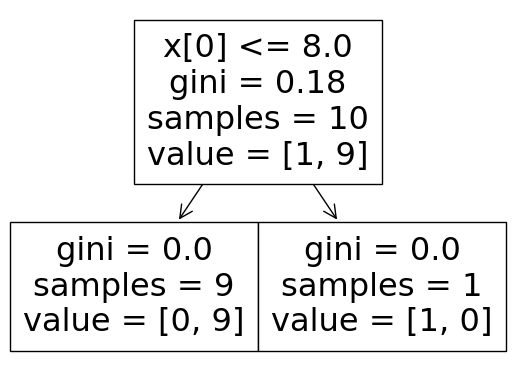

In [106]:
plot_tree(DT2)

<Axes: >

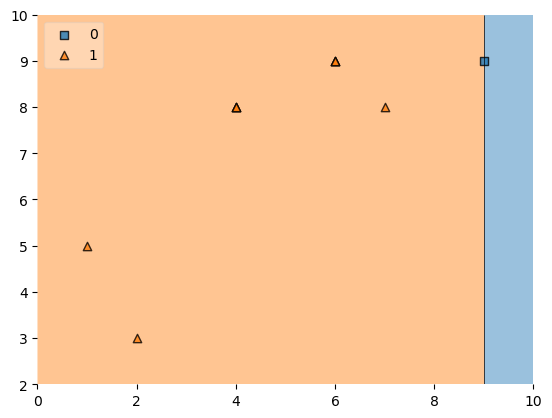

In [107]:
plot_decision_regions(X,y,clf=DT2,legend=2)

In [108]:
second_df["y_pred"]=DT2.predict(X)

In [109]:
second_df

X1  X2  label  sample_weights  y_pred
7   7   8      1             0.1       1
1   2   3      1             0.1       1
3   4   8      1             0.1       1
5   6   9      1             0.1       1
5   6   9      1             0.1       1
3   4   8      1             0.1       1
8   9   9      0             0.1       0
5   6   9      1             0.1       1
0   1   5      1             0.1       1
3   4   8      1             0.1       1

since, no misclassified points, we would stop or else, would have continued the same steps from the cell number 50 till 109

In [112]:
#final prediction
#final_prediction = alpha1*DT1

additive modelling

In [121]:
query=np.array([[5,1]])

In [122]:
DT1.predict(query)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [123]:
f=alpha1*(-1)

In [124]:
final_pred=np.sign(f)

In [125]:
final_pred

-1.0

In [126]:
query2=np.array([[6,9]])

In [127]:
DT1.predict(query2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)